# Mobile Game Analysis + Cohort Analysis

### An analysis of user progress data and a cohort analysis to visualize retention

Data can be found on Kaggle at [this link](https://www.kaggle.com/datasets/manchvictor/prediction-of-user-loss-in-mobile-games)

<b>Note to self for further analysis:</b> successful time distribution against the failed. As subplots stacked vertically

Also, be sure to look up whether 'time' is the beginning of session. I suspect it's probably beginning of level

And note that you've got 'user_id' here, so you can figure out when a user plays consecutive levels

Could be useful for the active users graph. Could also be interesting to see what order players play levels. For example, after playing level 5, do they tend to repeat level 5, go to level 6, etc



## Data Dictionary

level_seq.csv <b>"users"</b>

Each record is an attempt to play a level. The meaning of each column is as follows:
- 'user_id' : user id
- 'level_id' : level id
- f_success ': indicates whether to complete the clearance (1: completes the clearance, 0: fails).
- f_duration ': the duration of the attempt (unit: s);
- f_reststep ': the ratio of the remaining steps to the limited steps (failure is 0);
- f_help ': Whether extra help, such as props and hints, was used (1: used, 0: not used);
'time' : indicates the timestamp.

level_meta.csv <b>"levels"</b>

Some statistical characteristics of each level. The meaning of each column is as follows:

- f_avg_duration ': Average time spent on each attempt (unit s, including successful and failed attempts);
- 'f_avg_passrate' : average clearance rate;
- f_avg_win_duration ': Average time spent on each clearance (in s, including only the attempts to clear the clearance);
- f_avg_retrytimes' : Average number of retries (the second time to play the same level counts as the first retry);
- 'level_id' : indicates the id of the level, which can be matched with the level in level_seq.csv.

# Table of Contents

[Data Dictionary](#Data-Dictionary)

[Step 1: Import Libraries and Data](#Step-1:-Import-and-Cleaning)

[Step 2: Exploratory Data Analysis](#Step-2:-EDA)

> [Step 2a: Users](#Step-2a:-Users)

> [Step 2b: Levels](#Step-2b:-Levels)

[Step 3: Performance Questions](#Step-3:-Performance-Questions)

[Step 4: Retention](#Step-4:-Retention)

## Step 1: Import and Cleaning

In [1]:
#Import libraries
import pandas as pd
import glob
import os
import datetime as dt
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter, AutoMinorLocator)
import matplotlib.dates
import matplotlib.dates as mdates
import seaborn as sns

In [2]:
#Import csv files
path = "/Users/raws/Downloads/mobile_game_data"
csv_files = glob.glob(path + "/*.csv")

csv_files

['/Users/raws/Downloads/mobile_game_data/test.csv',
 '/Users/raws/Downloads/mobile_game_data/level_seq.csv',
 '/Users/raws/Downloads/mobile_game_data/dev.csv',
 '/Users/raws/Downloads/mobile_game_data/train.csv',
 '/Users/raws/Downloads/mobile_game_data/level_meta.csv']

In [3]:
#Append csvs to list using list comprehension
df_list = [pd.read_csv(filename, delimiter='\t', index_col=None, header=0) for filename in csv_files]
df_list

[      user_id
 0           1
 1           2
 2           3
 3           4
 4           5
 ...       ...
 2768     2769
 2769     2770
 2770     2771
 2771     2772
 2772     2773
 
 [2773 rows x 1 columns],
          user_id  level_id  f_success  f_duration  f_reststep  f_help  \
 0          10932         1          1       127.0    0.500000       0   
 1          10932         2          1        69.0    0.703704       0   
 2          10932         3          1        67.0    0.560000       0   
 3          10932         4          1        58.0    0.700000       0   
 4          10932         5          1        83.0    0.666667       0   
 ...          ...       ...        ...         ...         ...     ...   
 2194346    10931        40          1       111.0    0.250000       1   
 2194347    10931        41          1        76.0    0.277778       0   
 2194348    10931        42          0       121.0    0.000000       1   
 2194349    10931        42          0       115.0  

In [4]:
#Assign csvs to dataframe using list indices
users = df_list[1]
levels = df_list[4]

In [5]:
#Examine users dataframe
users.head()

,user_id,level_id,f_success,f_duration,f_reststep,f_help,time
0,10932,1,1,127.0,0.500000,0,2020-02-01 00:05:51
1,10932,2,1,69.0,0.703704,0,2020-02-01 00:08:01
2,10932,3,1,67.0,0.560000,0,2020-02-01 00:09:50
3,10932,4,1,58.0,0.700000,0,2020-02-01 00:11:16
4,10932,5,1,83.0,0.666667,0,2020-02-01 00:13:12


In [6]:
#Summary statistics for users and suppress scientific notation
pd.set_option('display.float_format', lambda x: '%.2f' % x)
users.describe()

,user_id,level_id,f_success,f_duration,f_reststep,f_help
count,2194351.00,2194351.00,2194351.00,2194351.00,2194351.00,2194351.00
mean,6745.03,96.84,0.53,108.12,0.17,0.04
std,3942.09,84.11,0.50,53.61,0.23,0.21
min,1.00,1.00,0.00,1.00,0.00,0.00
25%,3287.00,41.00,0.00,77.00,0.00,0.00
50%,6688.00,80.00,1.00,100.00,0.05,0.00
75%,10163.00,142.00,1.00,127.00,0.29,0.00
max,13589.00,1509.00,1.00,600.00,1.00,1.00


In [7]:
#Examine data types for users
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2194351 entries, 0 to 2194350
Data columns (total 7 columns):
 #   Column      Dtype  
---  ------      -----  
 0   user_id     int64  
 1   level_id    int64  
 2   f_success   int64  
 3   f_duration  float64
 4   f_reststep  float64
 5   f_help      int64  
 6   time        object 
dtypes: float64(2), int64(4), object(1)
memory usage: 117.2+ MB


In [8]:
#Check for duplicates
users.duplicated().sum()

69322

In [9]:
#Check for null values
users.isna().sum()

user_id       0
level_id      0
f_success     0
f_duration    0
f_reststep    0
f_help        0
time          0
dtype: int64

In [10]:
#Assign duplicates to a variable and examine them
dupes = users[users.duplicated()]
dupes

,user_id,level_id,f_success,f_duration,f_reststep,f_help,time
64,10932,50,0,153.00,0.00,0,2020-02-01 17:05:43
65,10932,50,0,153.00,0.00,0,2020-02-01 17:05:43
665,2774,42,1,130.00,0.05,0,2020-02-01 10:56:34
667,2774,44,1,116.00,0.21,0,2020-02-01 11:02:32
707,2774,62,1,89.00,0.43,0,2020-02-02 09:10:50
...,...,...,...,...,...,...,...
2192592,10924,36,1,110.00,0.50,0,2020-02-02 00:45:41
2193091,13586,104,0,155.00,0.00,0,2020-02-03 21:13:35
2193569,10927,137,1,73.00,0.29,0,2020-02-02 22:36:23
2193666,10927,207,0,166.00,0.00,0,2020-02-04 20:59:36


<div class="alert alert-warning">
  <strong>Summary of Findings</strong>
    <li>Out of roughly 2.2 million rows there are about 70k duplicates.</li>
    <li>There are no null values.</li>
    <li>user_id needs to be converted to string.</li>
    <li>time needs to be converted to datetime.</li>
    <li>columns should be renamed to remove "f_".</li>
</div>

In [11]:
#Drop duplicates
users.drop_duplicates(inplace=True)

In [12]:
#Change user_id to string datatype using assignment
users['user_id'] = users['user_id'].astype('str')

In [13]:
#Convert time to datetime object
users['time'] = pd.to_datetime(users['time'], format='%Y-%m-%d %H:%M:%S')

In [14]:
#Ensure type conversion success
users.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2125029 entries, 0 to 2194350
Data columns (total 7 columns):
 #   Column      Dtype         
---  ------      -----         
 0   user_id     object        
 1   level_id    int64         
 2   f_success   int64         
 3   f_duration  float64       
 4   f_reststep  float64       
 5   f_help      int64         
 6   time        datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(3), object(1)
memory usage: 129.7+ MB


In [15]:
#Rename columns to remove "f_"
users.rename(columns=({'f_success':'success','f_duration':'duration',
                       'f_reststep':'reststep','f_help':'help'}), inplace=True)

In [16]:
#Ensure column rename success
users

,user_id,level_id,success,duration,reststep,help,time
0,10932,1,1,127.00,0.50,0,2020-02-01 00:05:51
1,10932,2,1,69.00,0.70,0,2020-02-01 00:08:01
2,10932,3,1,67.00,0.56,0,2020-02-01 00:09:50
3,10932,4,1,58.00,0.70,0,2020-02-01 00:11:16
4,10932,5,1,83.00,0.67,0,2020-02-01 00:13:12
...,...,...,...,...,...,...,...
2194346,10931,40,1,111.00,0.25,1,2020-02-03 16:26:37
2194347,10931,41,1,76.00,0.28,0,2020-02-03 16:28:06
2194348,10931,42,0,121.00,0.00,1,2020-02-03 16:30:17
2194349,10931,42,0,115.00,0.00,0,2020-02-03 16:33:40


<div class="alert alert-success">
  <strong>Summary of Actions</strong>
    <li>Dropped ~70k duplicates.</li>
    <li>Changed user_id to string.</li>
    <li>Converted time to datetime object.</li>
    <li>Removed "f_"'s from column names.</li>
</div>

In [17]:
#Examine levels dataset
levels.head()

,f_avg_duration,f_avg_passrate,f_avg_win_duration,f_avg_retrytimes,level_id
0,39.89,0.94,35.58,0.02,1
1,60.68,0.99,56.72,0.00,2
2,76.95,0.99,71.79,0.00,3
3,58.17,0.99,54.84,0.00,4
4,101.78,0.95,85.65,0.03,5


In [18]:
#Examine levels data types
levels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1509 entries, 0 to 1508
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   f_avg_duration      1509 non-null   float64
 1   f_avg_passrate      1509 non-null   float64
 2   f_avg_win_duration  1509 non-null   float64
 3   f_avg_retrytimes    1509 non-null   float64
 4   level_id            1509 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 59.1 KB


In [19]:
#Summary statistics for levels
levels.describe()

,f_avg_duration,f_avg_passrate,f_avg_win_duration,f_avg_retrytimes,level_id
count,1509.00,1509.00,1509.00,1509.00,1509.00
mean,514.41,0.45,116.01,3.42,755.00
std,234.73,0.19,27.66,4.07,435.76
min,39.89,0.00,35.58,0.00,1.00
25%,372.25,0.33,101.24,2.00,378.00
50%,497.65,0.40,112.67,3.29,755.00
75%,623.59,0.51,126.44,4.41,1132.00
max,2105.00,1.00,540.00,98.00,1509.00


In [20]:
#Check for duplicates
levels.duplicated().sum()

0

In [21]:
#Check for null values
levels.isna().sum()

f_avg_duration        0
f_avg_passrate        0
f_avg_win_duration    0
f_avg_retrytimes      0
level_id              0
dtype: int64

<div class="alert alert-warning">
  <strong>Summary of Findings</strong>
    <li>No null values or duplicates.</li>
    <li>No need for data type conversions. level_id is technically a serial number and I could convert it to string, but not absolutely necessary.</li>
    <li>Need to move level_id to the left side.</li>
</div>

In [22]:
#Assign columns to list variable
cols = levels.columns.tolist()

In [23]:
#Check column list variable
cols

['f_avg_duration',
 'f_avg_passrate',
 'f_avg_win_duration',
 'f_avg_retrytimes',
 'level_id']

In [24]:
#Move level_id to first position by adding the last element of the column list (level_id)
#to a list slice of all elements except the last element and reassign the cols list
cols = cols[-1:] + cols[:-1]

In [25]:
#Ensure proper order
cols

['level_id',
 'f_avg_duration',
 'f_avg_passrate',
 'f_avg_win_duration',
 'f_avg_retrytimes']

In [26]:
#Assign newly ordered list to levels dataframe
levels = levels[cols]

In [27]:
#Ensure success
levels

,level_id,f_avg_duration,f_avg_passrate,f_avg_win_duration,f_avg_retrytimes
0,1,39.89,0.94,35.58,0.02
1,2,60.68,0.99,56.72,0.00
2,3,76.95,0.99,71.79,0.00
3,4,58.17,0.99,54.84,0.00
4,5,101.78,0.95,85.65,0.03
...,...,...,...,...,...
1504,1505,594.88,0.45,133.62,3.19
1505,1506,486.56,0.45,115.91,3.22
1506,1507,325.97,0.57,86.25,2.69
1507,1508,793.10,0.32,164.00,5.42


<div class="alert alert-success">
  <strong>Summary of Actions</strong>
    <li>Moved level_id to the left side for better readability.</li>
</div>

## Step 2: EDA

### Step 2a: Users

In [28]:
#Display users first 5 rows
users.head()

,user_id,level_id,success,duration,reststep,help,time
0,10932,1,1,127.00,0.50,0,2020-02-01 00:05:51
1,10932,2,1,69.00,0.70,0,2020-02-01 00:08:01
2,10932,3,1,67.00,0.56,0,2020-02-01 00:09:50
3,10932,4,1,58.00,0.70,0,2020-02-01 00:11:16
4,10932,5,1,83.00,0.67,0,2020-02-01 00:13:12


In [29]:
#Examine number of uniqiue users
users['user_id'].nunique()

13589

In [30]:
#Examine number of levels
users['level_id'].max()

1509

In [31]:
#Count of successful and failed level attempts
users['success'].value_counts()

1    1121482
0    1003547
Name: success, dtype: int64

In [136]:
#Frequency of successful and failed level attempts
users['success'].value_counts(normalize=True).mul(100).round(1).astype(str) + '%'

1    52.8%
0    47.2%
Name: success, dtype: object

In [33]:
#Summary statistics for level attempt duration
users['duration'].describe()

count   2125029.00
mean        107.97
std          53.58
min           1.00
25%          77.00
50%          99.00
75%         127.00
max         600.00
Name: duration, dtype: float64

In [34]:
#Bins of level attempt duration
users['duration'].value_counts(bins=[0,30,60,90,120,180,240,300,420,540,600]).sort_index()

(-0.001, 30.0]     39631
(30.0, 60.0]      198198
(60.0, 90.0]      609736
(90.0, 120.0]     641522
(120.0, 180.0]    502838
(180.0, 240.0]     86564
(240.0, 300.0]     22077
(300.0, 420.0]     15391
(420.0, 540.0]      6742
(540.0, 600.0]      2330
Name: duration, dtype: int64

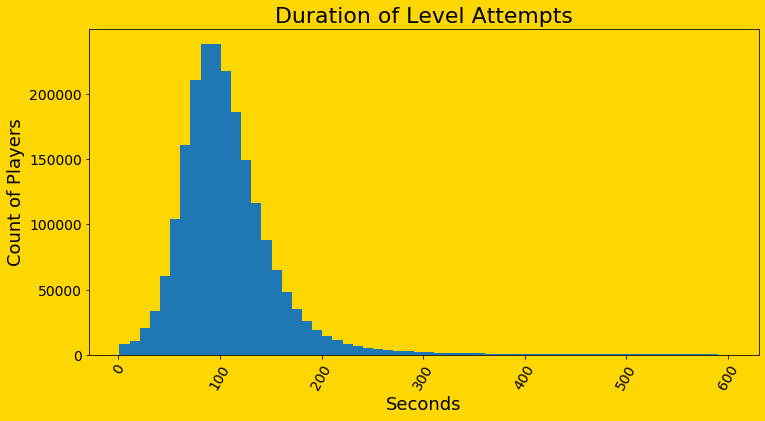

In [35]:
#Histogram of level attempt duration
plt.rcParams.update({'axes.facecolor':'gold'})
plt.figure(figsize=(12,6), facecolor='gold')
users['duration'].plot(kind='hist', bins=60)
plt.xlabel('Seconds', fontsize=18)
plt.ylabel('Count of Players', fontsize=18)
plt.xticks(fontsize=14, rotation=60)
plt.yticks(fontsize=14)
plt.title('Duration of Level Attempts', fontsize=22)
#plt.tight_layout()
plt.show()

In [36]:
#Summary statistics for ratio of remaining steps to limited steps (zero is failure)
users['reststep'].describe()

count   2125029.00
mean          0.17
std           0.23
min           0.00
25%           0.00
50%           0.05
75%           0.29
max           1.00
Name: reststep, dtype: float64

In [37]:
#Bins of remaining steps
users['reststep'].value_counts(bins=[0,.1,.2,.3,.4,.5,.6,.7,.8,.9,1])

(-0.001, 0.1]    1214599
(0.1, 0.2]        228139
(0.2, 0.3]        182524
(0.3, 0.4]        150483
(0.4, 0.5]        131613
(0.5, 0.6]         78533
(0.6, 0.7]         61077
(0.7, 0.8]         44052
(0.9, 1.0]         18590
(0.8, 0.9]         15419
Name: reststep, dtype: int64

In [139]:
#Frequency of remaining steps (failure is zero)
users['reststep'].value_counts(bins=[0,.1,.2,.3,.4,.5,.6,.7,.8,.9,1],
                               normalize=True).mul(100).round(1).astype(str) + '%'

(-0.001, 0.1]    57.2%
(0.1, 0.2]       10.7%
(0.2, 0.3]        8.6%
(0.3, 0.4]        7.1%
(0.4, 0.5]        6.2%
(0.5, 0.6]        3.7%
(0.6, 0.7]        2.9%
(0.7, 0.8]        2.1%
(0.9, 1.0]        0.9%
(0.8, 0.9]        0.7%
Name: reststep, dtype: object

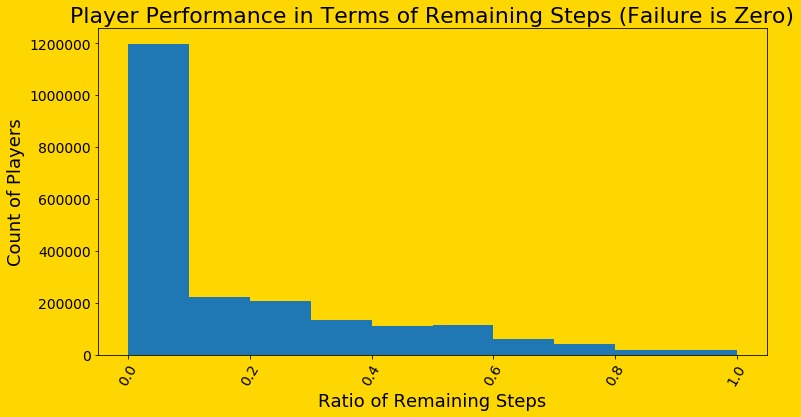

In [39]:
#Histogram of player performance in terms of their ratio of remaining steps
plt.rcParams.update({'axes.facecolor':'gold'})
plt.figure(figsize=(12,6), facecolor='gold')
users['reststep'].plot(kind='hist', bins=10)
plt.xlabel('Ratio of Remaining Steps', fontsize=18)
plt.ylabel('Count of Players', fontsize=18)
plt.xticks(fontsize=14, rotation=60)
plt.yticks(fontsize=14)
plt.title('Player Performance in Terms of Remaining Steps (Zero is Failure)', fontsize=22)
#plt.tight_layout()
plt.show()

In [40]:
#Count of whether or not hints were used
users['help'].value_counts()

0    2031601
1      93428
Name: help, dtype: int64

In [134]:
#Frequency of whether or not hints were used
users['help'].value_counts(normalize=True).mul(100).round(1).astype(str) + '%'

0    95.6%
1     4.4%
Name: help, dtype: object

In [42]:
#Examine time interval of data collection
print(users['time'].min(), users['time'].max())

2020-02-01 00:00:20 2020-02-04 23:59:59


In [163]:
#Assign variable for count of play sessions over time
level_time_1000 = users.groupby(['time'])['user_id'].count().head(1000)

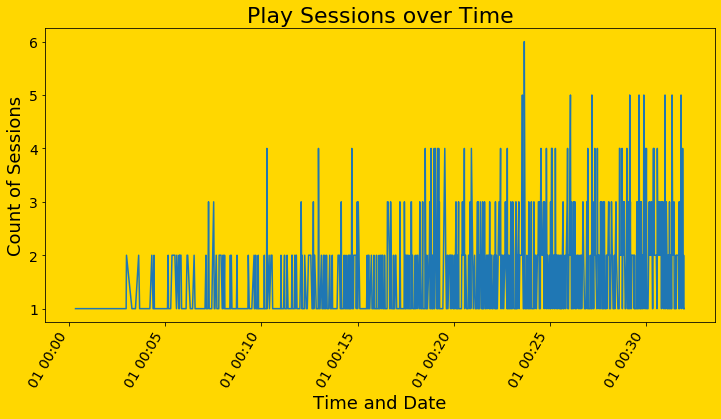

In [164]:
#Line graph of count of play sessions over time
plt.rcParams.update({'axes.facecolor':'gold'})
plt.figure(figsize=(12,6), facecolor='gold')
level_time_1000.plot(kind='line')
plt.xlabel('Time and Date', fontsize=18)
plt.ylabel('Count of Sessions', fontsize=18)
plt.xticks(fontsize=14, rotation=60)
plt.yticks(fontsize=14)
plt.title('Play Sessions over Time', fontsize=22)
#plt.tight_layout()
plt.show()

In [165]:
#Assign variable for count of play sessions over time
level_time_1000_tail = users.groupby(['time'])['user_id'].count().tail(1000)

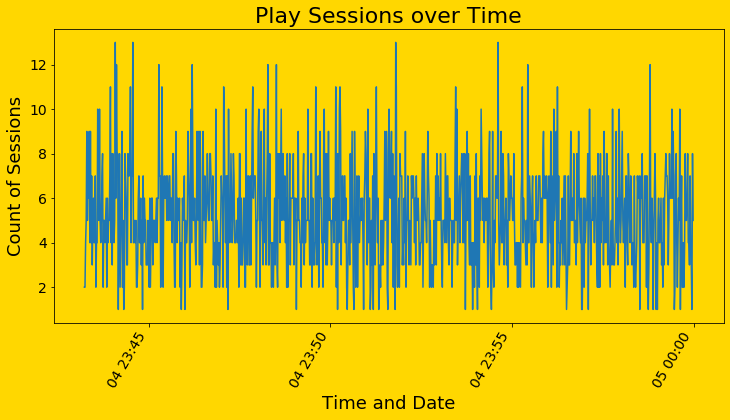

In [166]:
#Line graph of count of play sessions over time
plt.rcParams.update({'axes.facecolor':'gold'})
plt.figure(figsize=(12,6), facecolor='gold')
level_time_1000_tail.plot(kind='line')
plt.xlabel('Time and Date', fontsize=18)
plt.ylabel('Count of Sessions', fontsize=18)
plt.xticks(fontsize=14, rotation=60)
plt.yticks(fontsize=14)
plt.title('Play Sessions over Time', fontsize=22)
#plt.tight_layout()
plt.show()

In [43]:
#Assign variable for count of play sessions over time
level_time = users.groupby(['time'])['user_id'].count()

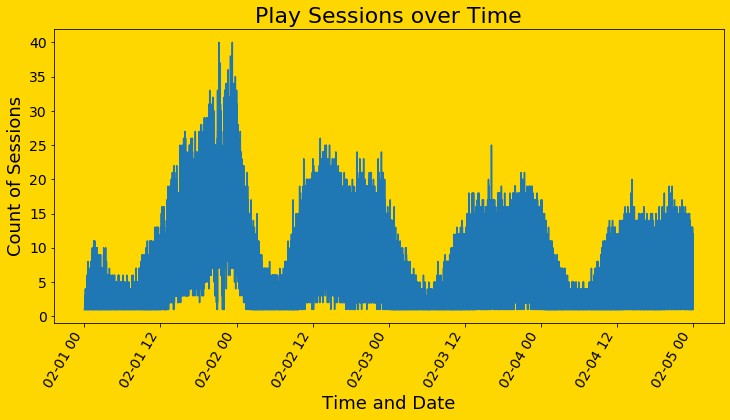

In [44]:
#Line graph of count of play sessions over time
plt.rcParams.update({'axes.facecolor':'gold'})
plt.figure(figsize=(12,6), facecolor='gold')
level_time.plot(kind='line')
plt.xlabel('Time and Date', fontsize=18)
plt.ylabel('Count of Sessions', fontsize=18)
plt.xticks(fontsize=14, rotation=60)
plt.yticks(fontsize=14)
plt.title('Play Sessions over Time', fontsize=22)
#plt.tight_layout()
plt.show()

<div class="alert alert-warning">
  <strong>Summary of Findings</strong>
    <li>There are 13,589 players.</li>
    <li>There are 1509 levels.</li>
    <li>There's an almost even number of level completions and failures.</li>
    <li>Level attempt duration is unimodal around ~100 seconds and features right skewness.</li>
    <li>Player performance in terms of ratio of remaining steps is unimodal around 0.1 and features right skewness</li> 
    <li>Most users (96%) don't use hints.</li>
    <li>This data was collected from the beginning of Feb 1, 2020 to the end of Feb 4, 2020.</li>
    <li>Play time was concentrated at the following days and times:</li>
         <ol>
            <li>Feb 1: 6pm to midnight.</li>
            <li>Feb 2: Around noon and then again at night.</li>
            <li>Feb 3: Noon to midnight.</li>
            <li>Feb 4: Noon to midnight.</li>
         </ol>
</div>

In [45]:
#Create variable for level attempt successes
success_users = users[users['success'] == 1]

In [46]:
#Summary statistics for level attempt successes
success_users.describe()

,level_id,success,duration,reststep,help
count,1121482.00,1121482.00,1121482.00,1121482.00,1121482.00
mean,69.92,1.00,104.21,0.28,0.06
std,67.51,0.00,52.18,0.22,0.24
min,1.00,1.00,13.00,0.00,0.00
25%,24.00,1.00,72.00,0.10,0.00
50%,54.00,1.00,96.00,0.23,0.00
75%,97.00,1.00,124.00,0.42,0.00
max,1508.00,1.00,600.00,1.00,1.00


In [47]:
#Number of unique users who successfully completed levels
success_users['user_id'].nunique()

13573

In [128]:
#Percentage of unique users who successfully completed levels
print(round(success_users['user_id'].nunique() / users['user_id'].nunique(),4) * 100, '%')

99.88 %


In [48]:
#Number of unique levels that were successfully completed
success_users['level_id'].nunique()

1483

In [49]:
#Summary statistics for successful level attempt duration
success_users['duration'].describe()

count   1121482.00
mean        104.21
std          52.18
min          13.00
25%          72.00
50%          96.00
75%         124.00
max         600.00
Name: duration, dtype: float64

In [50]:
#Bins of successful level attempt duration
success_users['duration'].value_counts(bins=[0,10,20,30,40,50,60,70,80,90,100,
                                             110,120,130,140,150,160,170,180,190,200,600]).sort_index()

(-0.001, 10.0]         0
(10.0, 20.0]        1223
(20.0, 30.0]       12170
(30.0, 40.0]       24426
(40.0, 50.0]       47594
(50.0, 60.0]       73988
(60.0, 70.0]       98823
(70.0, 80.0]      116694
(80.0, 90.0]      124096
(90.0, 100.0]     119575
(100.0, 110.0]    107001
(110.0, 120.0]     90306
(120.0, 130.0]     72148
(130.0, 140.0]     55597
(140.0, 150.0]     42338
(150.0, 160.0]     31501
(160.0, 170.0]     23118
(170.0, 180.0]     16941
(180.0, 190.0]     12587
(190.0, 200.0]      9392
(200.0, 600.0]     41964
Name: duration, dtype: int64

In [141]:
#Frequency of successful level attempt duration
success_users['duration'].value_counts(bins=[0,10,20,30,40,50,60,70,80,90,100,
                                             110,120,130,140,150,160,170,180,190,200,600],
                                       normalize=True).sort_index().mul(100).round(1).astype(str) + '%'

(-0.001, 10.0]     0.0%
(10.0, 20.0]       0.1%
(20.0, 30.0]       1.1%
(30.0, 40.0]       2.2%
(40.0, 50.0]       4.2%
(50.0, 60.0]       6.6%
(60.0, 70.0]       8.8%
(70.0, 80.0]      10.4%
(80.0, 90.0]      11.1%
(90.0, 100.0]     10.7%
(100.0, 110.0]     9.5%
(110.0, 120.0]     8.1%
(120.0, 130.0]     6.4%
(130.0, 140.0]     5.0%
(140.0, 150.0]     3.8%
(150.0, 160.0]     2.8%
(160.0, 170.0]     2.1%
(170.0, 180.0]     1.5%
(180.0, 190.0]     1.1%
(190.0, 200.0]     0.8%
(200.0, 600.0]     3.7%
Name: duration, dtype: object

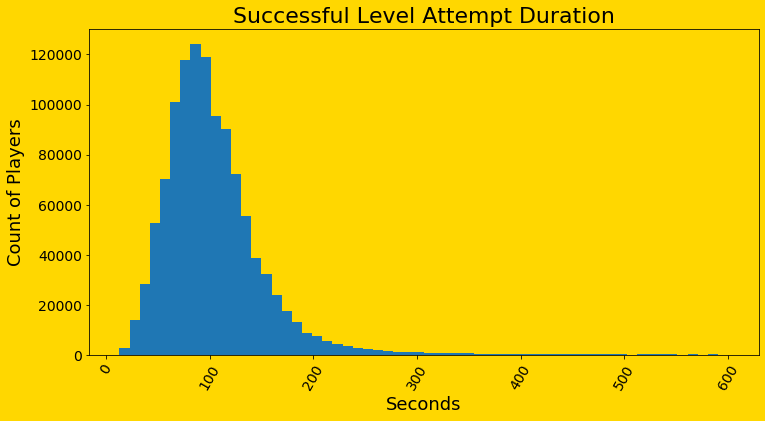

In [52]:
#Histogram of successful level attempt duration
plt.rcParams.update({'axes.facecolor':'gold'})
plt.figure(figsize=(12,6), facecolor='gold')
success_users['duration'].plot(kind='hist', bins=60)
plt.xlabel('Seconds', fontsize=18)
plt.ylabel('Count of Players', fontsize=18)
plt.xticks(fontsize=14, rotation=60)
plt.yticks(fontsize=14)
plt.title('Successful Level Attempt Duration', fontsize=22)
#plt.tight_layout()
plt.show()

In [53]:
#
success_users['reststep'].describe()

count   1121482.00
mean          0.28
std           0.22
min           0.00
25%           0.10
50%           0.23
75%           0.42
max           1.00
Name: reststep, dtype: float64

In [143]:
success_users['reststep'].value_counts(bins=10).sort_index()

(-0.002, 0.1]    301694
(0.1, 0.2]       210331
(0.2, 0.3]       171295
(0.3, 0.4]       140331
(0.4, 0.5]       122511
(0.5, 0.6]        70955
(0.6, 0.7]        53619
(0.7, 0.8]        36480
(0.8, 0.9]         8259
(0.9, 1.0]         6007
Name: reststep, dtype: int64

In [145]:
success_users['reststep'].value_counts(bins=10, normalize=True).sort_index().mul(100).round(1).astype(str) + '%'

(-0.002, 0.1]    26.9%
(0.1, 0.2]       18.8%
(0.2, 0.3]       15.3%
(0.3, 0.4]       12.5%
(0.4, 0.5]       10.9%
(0.5, 0.6]        6.3%
(0.6, 0.7]        4.8%
(0.7, 0.8]        3.3%
(0.8, 0.9]        0.7%
(0.9, 1.0]        0.5%
Name: reststep, dtype: object

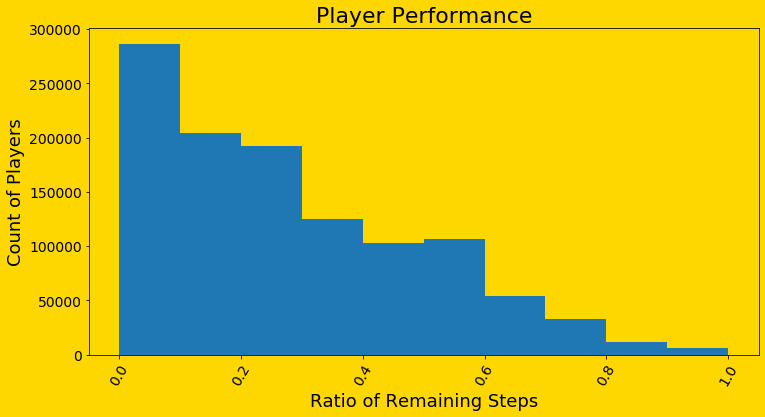

In [56]:
#Histogram of successful player performance in terms of their ratio of remaining steps (Zero is failure)
plt.rcParams.update({'axes.facecolor':'gold'})
plt.figure(figsize=(12,6), facecolor='gold')
success_users['reststep'].plot(kind='hist')
plt.xlabel('Ratio of Remaining Steps', fontsize=18)
plt.ylabel('Count of Players', fontsize=18)
plt.xticks(fontsize=14, rotation=60)
plt.yticks(fontsize=14)
plt.title('Player Performance', fontsize=22)
#plt.tight_layout()
plt.show()

In [57]:
success_users['help'].value_counts()

0    1053366
1      68116
Name: help, dtype: int64

In [146]:
success_users['help'].value_counts(normalize=True).mul(100).round(1).astype(str) + '%'

0    93.9%
1     6.1%
Name: help, dtype: object

<div class="alert alert-warning">
  <strong>Summary of Findings</strong>
    <li>Of the 13,589 total players, 13,573 have completed at least one level.</li>
    <li>There are 1,483 levels (out of 1,509) that have been completed, even though the penultimate level has been completed. How can you advance without completing a level?</li>
    <li>Successful level attempt duration is unimodal around ~100 seconds and features right skewness.</li>
    <li>Successful player performance in terms of ratio of remaining steps is unimodal around 0.1 and features right skewness</li> 
    <li>Most users (94%) don't use hints.</li>
</div>

In [59]:
fail_users = users[users['success'] == 0]

In [60]:
fail_users.describe()

,level_id,success,duration,reststep,help
count,1003547.00,1003547.00,1003547.00,1003547.00,1003547.00
mean,128.26,0.00,112.17,0.05,0.03
std,90.67,0.00,54.80,0.17,0.16
min,1.00,0.00,1.00,0.00,0.00
25%,73.00,0.00,82.00,0.00,0.00
50%,113.00,0.00,104.00,0.00,0.00
75%,174.00,0.00,131.00,0.00,0.00
max,1509.00,0.00,600.00,1.00,1.00


In [61]:
fail_users['user_id'].nunique()

12894

In [62]:
fail_users['level_id'].nunique()

1222

In [63]:
fail_users['duration'].describe()

count   1003547.00
mean        112.17
std          54.80
min           1.00
25%          82.00
50%         104.00
75%         131.00
max         600.00
Name: duration, dtype: float64

In [64]:
fail_users['duration'].value_counts(bins=[0,10,20,30,40,50,60,70,80,90,100,
                                             110,120,130,140,150,160,170,180,190,200,600]).sort_index()

(-0.001, 10.0]      8545
(10.0, 20.0]        9193
(20.0, 30.0]        8500
(30.0, 40.0]        9078
(40.0, 50.0]       12956
(50.0, 60.0]       30156
(60.0, 70.0]       62123
(70.0, 80.0]       94144
(80.0, 90.0]      113856
(90.0, 100.0]     118492
(100.0, 110.0]    110322
(110.0, 120.0]     95826
(120.0, 130.0]     77598
(130.0, 140.0]     60922
(140.0, 150.0]     45640
(150.0, 160.0]     33788
(160.0, 170.0]     24881
(170.0, 180.0]     18366
(180.0, 190.0]     13357
(190.0, 200.0]      9938
(200.0, 600.0]     45866
Name: duration, dtype: int64

In [148]:
fail_users['duration'].value_counts(bins=[0,10,20,30,40,50,60,70,80,90,100,110,
                                             120,130,140,150,160,170,180,190,200,600],
                                    normalize=True).sort_index().mul(100).round(1).astype(str) + '%'

(-0.001, 10.0]     0.9%
(10.0, 20.0]       0.9%
(20.0, 30.0]       0.8%
(30.0, 40.0]       0.9%
(40.0, 50.0]       1.3%
(50.0, 60.0]       3.0%
(60.0, 70.0]       6.2%
(70.0, 80.0]       9.4%
(80.0, 90.0]      11.3%
(90.0, 100.0]     11.8%
(100.0, 110.0]    11.0%
(110.0, 120.0]     9.5%
(120.0, 130.0]     7.7%
(130.0, 140.0]     6.1%
(140.0, 150.0]     4.5%
(150.0, 160.0]     3.4%
(160.0, 170.0]     2.5%
(170.0, 180.0]     1.8%
(180.0, 190.0]     1.3%
(190.0, 200.0]     1.0%
(200.0, 600.0]     4.6%
Name: duration, dtype: object

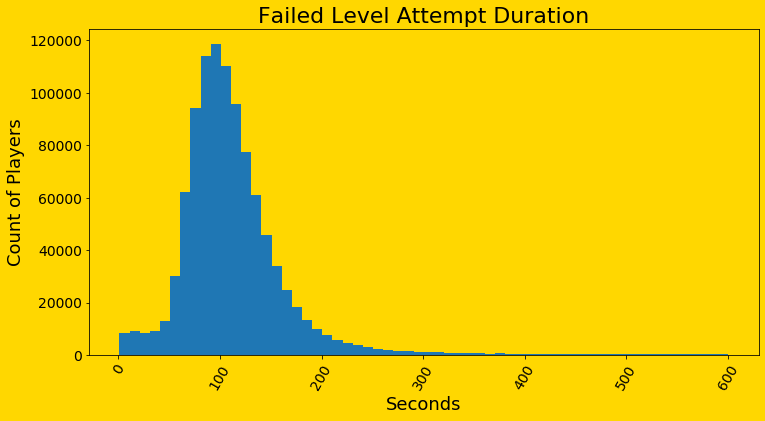

In [66]:
#Histogram of failed level attempt duration
plt.rcParams.update({'axes.facecolor':'gold'})
plt.figure(figsize=(12,6), facecolor='gold')
fail_users['duration'].plot(kind='hist', bins=60)
plt.xlabel('Seconds', fontsize=18)
plt.ylabel('Count of Players', fontsize=18)
plt.xticks(fontsize=14, rotation=60)
plt.yticks(fontsize=14)
plt.title('Failed Level Attempt Duration', fontsize=22)
#plt.tight_layout()
plt.show()

In [67]:
fail_users['reststep'].describe()

count   1003547.00
mean          0.05
std           0.17
min           0.00
25%           0.00
50%           0.00
75%           0.00
max           1.00
Name: reststep, dtype: float64

In [68]:
fail_users['reststep'].value_counts(bins=10)

(-0.002, 0.1]    912905
(0.1, 0.2]        17808
(0.9, 1.0]        12583
(0.2, 0.3]        11229
(0.3, 0.4]        10152
(0.4, 0.5]         9102
(0.5, 0.6]         7578
(0.7, 0.8]         7572
(0.6, 0.7]         7458
(0.8, 0.9]         7160
Name: reststep, dtype: int64

In [149]:
fail_users['reststep'].value_counts(bins=10, normalize=True).mul(100).round(1).astype(str) + '%'

(-0.002, 0.1]    91.0%
(0.1, 0.2]        1.8%
(0.9, 1.0]        1.3%
(0.2, 0.3]        1.1%
(0.3, 0.4]        1.0%
(0.4, 0.5]        0.9%
(0.5, 0.6]        0.8%
(0.7, 0.8]        0.8%
(0.6, 0.7]        0.7%
(0.8, 0.9]        0.7%
Name: reststep, dtype: object

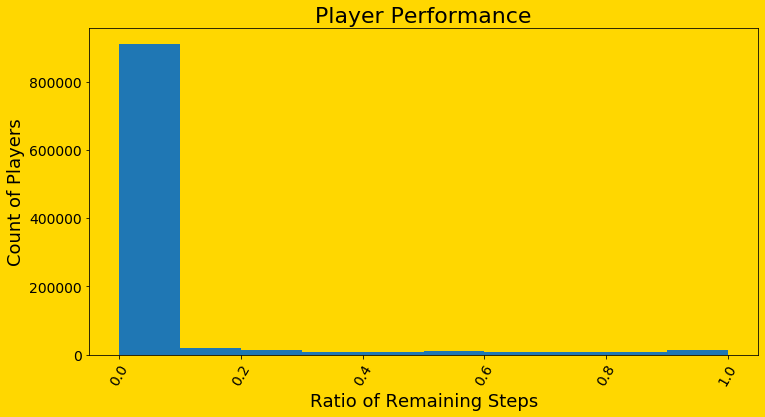

In [70]:
#Histogram of successful player performance in terms of their ratio of remaining steps (Zero is failure)
plt.rcParams.update({'axes.facecolor':'gold'})
plt.figure(figsize=(12,6), facecolor='gold')
fail_users['reststep'].plot(kind='hist')
plt.xlabel('Ratio of Remaining Steps', fontsize=18)
plt.ylabel('Count of Players', fontsize=18)
plt.xticks(fontsize=14, rotation=60)
plt.yticks(fontsize=14)
plt.title('Player Performance', fontsize=22)
#plt.tight_layout()
plt.show()

In [71]:
fail_users['help'].describe()

count   1003547.00
mean          0.03
std           0.16
min           0.00
25%           0.00
50%           0.00
75%           0.00
max           1.00
Name: help, dtype: float64

In [72]:
fail_users['help'].value_counts()

0    978235
1     25312
Name: help, dtype: int64

In [150]:
fail_users['help'].value_counts(normalize=True).mul(100).round(1).astype(str) + '%'

0    97.5%
1     2.5%
Name: help, dtype: object

<div class="alert alert-warning">
  <strong>Summary of Findings</strong>
    <li>Of the 13,589 total players, 12,894 have failed at least one level.</li>
    <li>There are 1,222 levels (out of 1,509) that have been faied.</li>
    <li>Failed level attempt duration is unimodal around ~100 seconds and features right skewness.</li>
    <li>Failed player performance in terms of ratio of remaining steps is unimodal around 0.1 and features right skewness</li> 
    <li>Most users (97%) don't use hints.</li>
</div>

### Step 2b: Levels

In [74]:
#Examine levels dataset
levels.head()

,level_id,f_avg_duration,f_avg_passrate,f_avg_win_duration,f_avg_retrytimes
0,1,39.89,0.94,35.58,0.02
1,2,60.68,0.99,56.72,0.00
2,3,76.95,0.99,71.79,0.00
3,4,58.17,0.99,54.84,0.00
4,5,101.78,0.95,85.65,0.03


In [75]:
#Rename columns to remove "f_"
levels.rename(columns=({'f_avg_duration':'avg_duration','f_avg_passrate':'avg_passrate',
                       'f_avg_win_duration':'avg_winduration','f_avg_retrytimes':'avg_retrytimes'}), inplace=True) 

In [76]:
#Ensure column rename success
levels.head()

,level_id,avg_duration,avg_passrate,avg_winduration,avg_retrytimes
0,1,39.89,0.94,35.58,0.02
1,2,60.68,0.99,56.72,0.00
2,3,76.95,0.99,71.79,0.00
3,4,58.17,0.99,54.84,0.00
4,5,101.78,0.95,85.65,0.03


In [77]:
#Summary statistics for average level duration
levels['avg_duration'].describe()

count   1509.00
mean     514.41
std      234.73
min       39.89
25%      372.25
50%      497.65
75%      623.59
max     2105.00
Name: avg_duration, dtype: float64

In [78]:
#Bins of average level duration
levels['avg_duration'].value_counts(bins=[0,100,200,300,400,500,600,700,800,900,1000,2000,2500]).sort_index()

(-0.001, 100.0]      24
(100.0, 200.0]       92
(200.0, 300.0]      128
(300.0, 400.0]      196
(400.0, 500.0]      322
(500.0, 600.0]      311
(600.0, 700.0]      191
(700.0, 800.0]      108
(800.0, 900.0]       56
(900.0, 1000.0]      33
(1000.0, 2000.0]     46
(2000.0, 2500.0]      2
Name: avg_duration, dtype: int64

In [151]:
#Frequency Bins of average level duration
levels['avg_duration'].value_counts(bins=[0,100,200,300,400,500,600,700,
                                          800,900,1000,2000,2500],
                                    normalize=True).sort_index().mul(100).round(1).astype(str) + '%'

(-0.001, 100.0]      1.6%
(100.0, 200.0]       6.1%
(200.0, 300.0]       8.5%
(300.0, 400.0]      13.0%
(400.0, 500.0]      21.3%
(500.0, 600.0]      20.6%
(600.0, 700.0]      12.7%
(700.0, 800.0]       7.2%
(800.0, 900.0]       3.7%
(900.0, 1000.0]      2.2%
(1000.0, 2000.0]     3.0%
(2000.0, 2500.0]     0.1%
Name: avg_duration, dtype: object

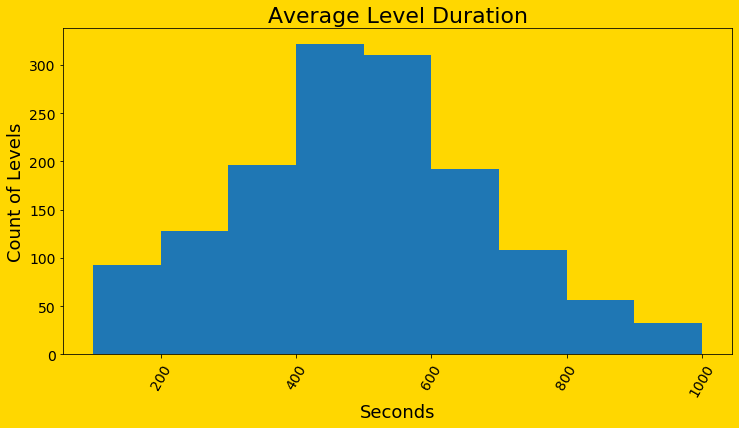

In [80]:
#Histogram of average level duration
plt.rcParams.update({'axes.facecolor':'gold'})
plt.figure(figsize=(12,6), facecolor='gold')
levels['avg_duration'].plot(kind='hist', bins=[100,200,300,400,500,600,700,800,900,1000])
plt.xlabel('Seconds', fontsize=18)
plt.ylabel('Count of Levels', fontsize=18)
plt.xticks(fontsize=14, rotation=60)
plt.yticks(fontsize=14)
plt.title('Average Level Duration', fontsize=22)
#plt.tight_layout()
plt.show()

In [81]:
#Summary statistics for average passrate
levels['avg_passrate'].describe()

count   1509.00
mean       0.45
std        0.19
min        0.00
25%        0.33
50%        0.40
75%        0.51
max        1.00
Name: avg_passrate, dtype: float64

In [82]:
levels['avg_passrate'].value_counts(bins=[0,.1,.2,.3,.4,.5,.6,.7,.8,.9,1]).sort_index()

(-0.001, 0.1]     17
(0.1, 0.2]        61
(0.2, 0.3]       176
(0.3, 0.4]       488
(0.4, 0.5]       374
(0.5, 0.6]       140
(0.6, 0.7]        85
(0.7, 0.8]        60
(0.8, 0.9]        40
(0.9, 1.0]        68
Name: avg_passrate, dtype: int64

In [152]:
levels['avg_passrate'].value_counts(bins=[0,.1,.2,.3,.4,.5,.6,.7,.8,.9,1],
                                    normalize=True).sort_index().mul(100).round(1).astype(str) + '%'

(-0.001, 0.1]     1.1%
(0.1, 0.2]        4.0%
(0.2, 0.3]       11.7%
(0.3, 0.4]       32.3%
(0.4, 0.5]       24.8%
(0.5, 0.6]        9.3%
(0.6, 0.7]        5.6%
(0.7, 0.8]        4.0%
(0.8, 0.9]        2.7%
(0.9, 1.0]        4.5%
Name: avg_passrate, dtype: object

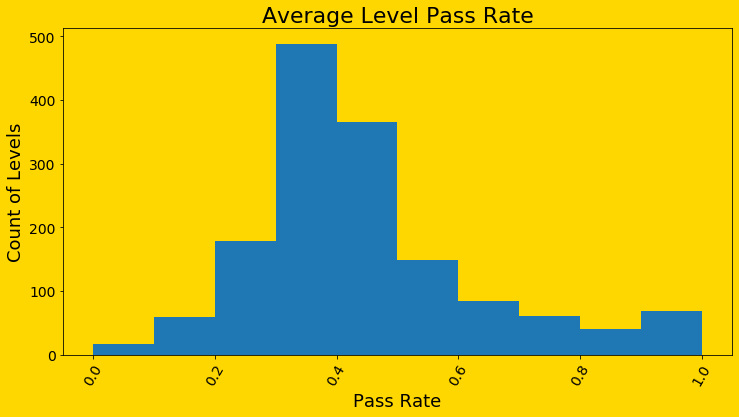

In [84]:
#Histogram of average level pass rate
plt.rcParams.update({'axes.facecolor':'gold'})
plt.figure(figsize=(12,6), facecolor='gold')
levels['avg_passrate'].plot(kind='hist')
plt.xlabel('Pass Rate', fontsize=18)
plt.ylabel('Count of Levels', fontsize=18)
plt.xticks(fontsize=14, rotation=60)
plt.yticks(fontsize=14)
plt.title('Average Level Pass Rate', fontsize=22)
#plt.tight_layout()
plt.show()

In [85]:
levels['avg_winduration'].describe()

count   1509.00
mean     116.01
std       27.66
min       35.58
25%      101.24
50%      112.67
75%      126.44
max      540.00
Name: avg_winduration, dtype: float64

In [86]:
#Bins of average level win duration
levels['avg_winduration'].value_counts(bins=[0,25,50,75,100,125,150,200,300,400,500,600]).sort_index()

(-0.001, 25.0]      0
(25.0, 50.0]        1
(50.0, 75.0]       25
(75.0, 100.0]     314
(100.0, 125.0]    760
(125.0, 150.0]    302
(150.0, 200.0]     89
(200.0, 300.0]     16
(300.0, 400.0]      0
(400.0, 500.0]      0
(500.0, 600.0]      2
Name: avg_winduration, dtype: int64

In [153]:
#Bins of average level win duration
levels['avg_winduration'].value_counts(bins=[0,25,50,75,100,125,150,200,300,400,500,600],
                                       normalize=True).sort_index().mul(100).round(1).astype(str) + '%'

(-0.001, 25.0]     0.0%
(25.0, 50.0]       0.1%
(50.0, 75.0]       1.7%
(75.0, 100.0]     20.8%
(100.0, 125.0]    50.4%
(125.0, 150.0]    20.0%
(150.0, 200.0]     5.9%
(200.0, 300.0]     1.1%
(300.0, 400.0]     0.0%
(400.0, 500.0]     0.0%
(500.0, 600.0]     0.1%
Name: avg_winduration, dtype: object

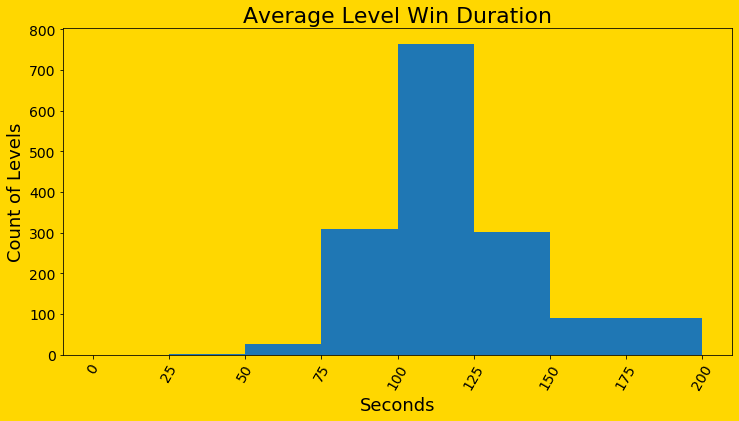

In [88]:
#Histogram of average level duration
plt.rcParams.update({'axes.facecolor':'gold'})
plt.figure(figsize=(12,6), facecolor='gold')
levels['avg_winduration'].plot(kind='hist',bins=[0,25,50,75,100,125,150,200])
plt.xlabel('Seconds', fontsize=18)
plt.ylabel('Count of Levels', fontsize=18)
plt.xticks(fontsize=14, rotation=60)
plt.yticks(fontsize=14)
plt.title('Average Level Win Duration', fontsize=22)
#plt.tight_layout()
plt.show()

In [89]:
#Summary statistics for average number of retries
levels['avg_retrytimes'].describe()

count   1509.00
mean       3.42
std        4.07
min        0.00
25%        2.00
50%        3.29
75%        4.41
max       98.00
Name: avg_retrytimes, dtype: float64

In [90]:
#Bins of average level retries
levels['avg_retrytimes'].value_counts(bins=[0,1,2,3,4,5,6,7,8,9,10,11,
                                            12,13,14,15,20,50,100]).sort_index()

(-0.001, 1.0]    256
(1.0, 2.0]       136
(2.0, 3.0]       251
(3.0, 4.0]       380
(4.0, 5.0]       263
(5.0, 6.0]       107
(6.0, 7.0]        52
(7.0, 8.0]        24
(8.0, 9.0]        16
(9.0, 10.0]        8
(10.0, 11.0]       3
(11.0, 12.0]       2
(12.0, 13.0]       5
(13.0, 14.0]       1
(14.0, 15.0]       0
(15.0, 20.0]       2
(20.0, 50.0]       1
(50.0, 100.0]      2
Name: avg_retrytimes, dtype: int64

In [154]:
#Frequency of bins of average level retries
levels['avg_retrytimes'].value_counts(bins=[0,1,2,3,4,5,6,7,8,9,10,100],
                                      normalize=True).sort_index().mul(100).round(1).astype(str) + '%'

(-0.001, 1.0]    17.0%
(1.0, 2.0]        9.0%
(2.0, 3.0]       16.6%
(3.0, 4.0]       25.2%
(4.0, 5.0]       17.4%
(5.0, 6.0]        7.1%
(6.0, 7.0]        3.4%
(7.0, 8.0]        1.6%
(8.0, 9.0]        1.1%
(9.0, 10.0]       0.5%
(10.0, 100.0]     1.1%
Name: avg_retrytimes, dtype: object

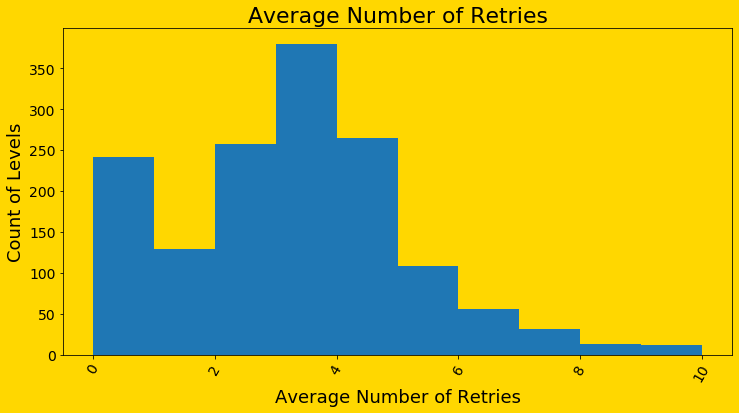

In [92]:
#Histogram of average number of retries
plt.rcParams.update({'axes.facecolor':'gold'})
plt.figure(figsize=(12,6), facecolor='gold')
levels['avg_retrytimes'].plot(kind='hist',bins=[0,1,2,3,4,5,6,7,8,9,10])
plt.xlabel('Average Number of Retries', fontsize=18)
plt.ylabel('Count of Levels', fontsize=18)
plt.xticks(fontsize=14, rotation=60)
plt.yticks(fontsize=14)
plt.title('Average Number of Retries', fontsize=22)
#plt.tight_layout()
plt.show()

<div class="alert alert-warning">
  <strong>Summary of Findings</strong>
    <li>Average level duration was normally distributed around 500/600 seconds.</li>
    <li>Average level pass rate was normally distributed around 30/40%.</li>
    <li>Average level win duration was normally distributed around 100 - 125 seconds.</li>
    <li>Average number of retries was multimodal around 1, 3, 4, and 5.</li>
</div>

# Step 3: Performance Questions

1) Which levels were beaten and failed the most?

2) Which levels took the longest and shortest to complete?

3) Which levels had the highest and lowest average pass rate?

4) Which levels had the most and least average number of retries?

5) What are the toughest levels?

In [93]:
#Most beaten levels
users.groupby(['level_id'])['success'].sum().sort_index().head(60)

level_id
1     12723
2     12481
3     12371
4     12307
5     12245
6     12226
7     12174
8     12146
9     11962
10    11916
11    11799
12    11807
13    11854
14    11633
15    11557
16    11573
17    11346
18    11212
19    11067
20    11015
21    11125
22    10940
23    10856
24    10766
25    10662
26    11244
27    10493
28    10457
29    10342
30    10279
31    10184
32    10091
33    10034
34     9903
35     9857
36     9866
37     9660
38     9577
39     9518
40     9401
41     9381
42     9208
43     9165
44     8988
45     8875
46     8920
47     8654
48     8654
49     8444
50     8517
51     9154
52     8777
53     8525
54     8367
55     8129
56     8092
57     7990
58     7834
59     7825
60     7769
Name: success, dtype: int64

In [94]:
#Most failed levels
fail_users['level_id'].value_counts().head(10)

73     11494
133    10879
148     9866
142     9438
49      9182
145     9060
75      9027
146     8759
99      8608
78      8449
Name: level_id, dtype: int64

In [162]:
#Which levels took the longest to complete
longest_levels = round(levels[levels['avg_duration'] > 1000].sort_values(by='avg_duration', ascending=False).head(10),2)
longest_levels.style.hide_index()

level_id,avg_duration,avg_passrate,avg_winduration,avg_retrytimes,duration_difference
1024,2105.000000,0.070000,175.000000,12.000000,1930.000000
1053,2076.000000,0.070000,129.000000,18.000000,1947.000000
1334,1893.000000,0.110000,108.600000,15.200000,1784.400000
1023,1681.000000,0.110000,210.000000,7.000000,1471.000000
1038,1580.500000,0.030000,98.000000,13.000000,1482.500000
625,1500.040000,0.190000,175.360000,8.040000,1324.680000
1002,1392.000000,0.090000,129.000000,9.000000,1263.000000
1272,1384.670000,0.320000,128.210000,12.140000,1256.450000
1018,1356.000000,0.120000,173.000000,6.000000,1183.000000
1353,1350.750000,0.380000,118.000000,10.500000,1232.750000


In [159]:
#Which levels took the shortest to complete
shortest_levels = round(levels[levels['avg_duration'] < 100].sort_values(by='avg_duration').head(10),2)
shortest_levels.style.hide_index()

level_id,avg_duration,avg_passrate,avg_winduration,avg_retrytimes,duration_difference
1,39.890000,0.940000,35.580000,0.020000,4.310000
180,55.690000,0.990000,54.010000,0.000000,1.680000
166,56.060000,1.000000,53.960000,0.000000,2.090000
4,58.170000,0.990000,54.840000,0.000000,3.330000
1067,60.500000,1.000000,60.500000,0.000000,0.000000
2,60.680000,0.990000,56.720000,0.000000,3.970000
16,68.620000,1.000000,65.040000,0.000000,3.580000
13,69.790000,1.000000,65.930000,0.000000,3.850000
6,74.670000,0.990000,69.900000,0.000000,4.760000
3,76.950000,0.990000,71.790000,0.000000,5.160000


In [97]:
#Levels with the highest average pass rate
highest_pass = levels[levels['avg_passrate'] > .9].sort_values(by='avg_passrate', ascending=False).head(40)
highest_pass.style.hide_index()

level_id,avg_duration,avg_passrate,avg_winduration,avg_retrytimes
1224,98.000000,1.000000,98.000000,0.000000
960,137.000000,1.000000,137.000000,0.000000
963,146.500000,1.000000,146.500000,0.000000
972,114.000000,1.000000,114.000000,0.000000
978,120.000000,1.000000,120.000000,0.000000
980,105.000000,1.000000,105.000000,0.000000
981,89.000000,1.000000,89.000000,0.000000
982,161.000000,1.000000,161.000000,0.000000
987,214.000000,1.000000,214.000000,0.000000
988,186.000000,1.000000,186.000000,0.000000


In [98]:
#Levels with the lowest average pass rate
lowest_pass = levels[levels['avg_passrate'] < .1].sort_values(by='avg_passrate').head(10)
lowest_pass.style.hide_index()

level_id,avg_duration,avg_passrate,avg_winduration,avg_retrytimes
983,1128.000000,0.000000,540.000000,98.000000
1015,1091.000000,0.000000,540.000000,98.000000
967,1003.000000,0.021739,123.000000,21.000000
1038,1580.500000,0.033333,98.000000,13.000000
1260,837.666667,0.063889,83.000000,9.500000
1053,2076.000000,0.066667,129.000000,18.000000
1235,1077.000000,0.067340,96.500000,8.000000
1024,2105.000000,0.071429,175.000000,12.000000
1427,593.750000,0.086219,133.000000,7.000000
1357,1174.250000,0.090362,105.000000,11.500000


In [99]:
#Levels with the most average retries
most_retries = levels[levels['avg_retrytimes'] > 10].sort_values(by='avg_retrytimes', ascending=False).head(10)
most_retries.style.hide_index()

level_id,avg_duration,avg_passrate,avg_winduration,avg_retrytimes
983,1128.000000,0.000000,540.000000,98.000000
1015,1091.000000,0.000000,540.000000,98.000000
967,1003.000000,0.021739,123.000000,21.000000
1053,2076.000000,0.066667,129.000000,18.000000
1334,1893.000000,0.105029,108.600000,15.200000
748,1106.458333,0.173490,103.727960,13.017632
1038,1580.500000,0.033333,98.000000,13.000000
1044,1158.000000,0.517857,109.500000,13.000000
1337,1348.200000,0.221164,110.200000,13.000000
1442,1140.250000,0.576637,94.750000,12.500000


In [100]:
#Levels with the least average retries
no_retries = levels[levels['avg_retrytimes']  == 0]
no_retries.reset_index()

,index,level_id,avg_duration,avg_passrate,avg_winduration,avg_retrytimes
0,117,118,80.15,0.88,73.50,0.00
1,118,119,97.51,0.85,90.13,0.00
2,165,166,56.06,1.00,53.96,0.00
3,166,167,115.82,0.75,104.64,0.00
4,167,168,159.71,0.30,153.02,0.00
5,168,169,81.64,0.87,74.94,0.00
6,169,170,97.59,0.85,91.61,0.00
7,179,180,55.69,0.99,54.01,0.00
8,180,181,113.95,0.75,104.34,0.00
9,183,184,182.71,0.99,53.87,0.00


In [101]:
tough_levels = levels.loc[(levels['avg_retrytimes'] > 15) & (levels['avg_passrate'] < .2)]
tough_levels

,level_id,avg_duration,avg_passrate,avg_winduration,avg_retrytimes
966,967,1003.00,0.02,123.00,21.00
982,983,1128.00,0.00,540.00,98.00
1014,1015,1091.00,0.00,540.00,98.00
1052,1053,2076.00,0.07,129.00,18.00
1333,1334,1893.00,0.11,108.60,15.20


In [102]:
levels['duration_difference'] = levels['avg_duration'] - levels['avg_winduration']

In [103]:
figured_out = levels[levels['duration_difference'] > 1200].sort_values(by=
                                                                       'duration_difference',ascending=False).head(10)
figured_out.style.hide_index()

level_id,avg_duration,avg_passrate,avg_winduration,avg_retrytimes,duration_difference
1053,2076.000000,0.066667,129.000000,18.000000,1947.000000
1024,2105.000000,0.071429,175.000000,12.000000,1930.000000
1334,1893.000000,0.105029,108.600000,15.200000,1784.400000
1038,1580.500000,0.033333,98.000000,13.000000,1482.500000
1023,1681.000000,0.111111,210.000000,7.000000,1471.000000
625,1500.038728,0.190159,175.361151,8.041727,1324.677576
1002,1392.000000,0.090909,129.000000,9.000000,1263.000000
1272,1384.666667,0.320156,128.214286,12.142857,1256.452381
1358,1337.250000,0.348214,98.333333,2.333333,1238.916667
1337,1348.200000,0.221164,110.200000,13.000000,1238.000000


<div class="alert alert-warning">
  <strong>Summary of Findings</strong>
    <ul><b><i>Which levels were beaten and failed the most?</i></b>
        <li>The earliest levels had the highest number of completions with the first 60 levels being completed by at least 50% of players.</li>
        <li>Levels 73 and 133 were failed over 10,000 times. Top 10 failed levels include 148, 142, 49, 145, 75, 146, 99, and 78 </li>
    </ul>
    <ul><b><i>Which levels took the longest and shortest to complete?</i></b> 
        <li>Levels 1024 and 1053 both took over 2000 seconds to complete. Top 10 levels with the longest average completion time include 1334, 1023, 1038, 625, 1002, 1272, 1018, 1353</li>
        <li>Levels 1, 180, 166, and 4 took on average less than a minute to complete. Top 10 shortest levels include 1067, 2, 16, 13, 6, and 3, each taking no longer than 76.95 seconds.</li>
    </ul>
    <ul><b><i>Which levels had the highest and lowest average pass rate?</i></b>
        <li>Many levels in the high 900s and low 1000s had a pass rate of 100%.</li>
        <li>Levels 983, 1015, 967, 1038, 1260, 1053, 1235, 1024, 1427, and 1357 all have average pass rates of less than 10%.</li>
    </ul>
    <ul><b><i>Which levels had the most and least average number of retries?</i></b>
        <li>Levels 983 and 1015 had 98 average retries a piece. Levels 967, 1053, 1334, 748, 1038, 1044, 1337, and 1442 all had between 13 and 21 average retries.</li>
        <li>There are 58 levels with no retries sprinkled fairly evenly throughout the game.</li>
    </ul>
    <br>
    <br>
    <b><i>Takeaways:</b></i>
    <br>
    <br>
    <li>Levels 967, 983, 1015, 1053, and 1334 are the toughest levels with the most retries and lowest average pass rates. </li>
    <li>Levels 1053, 1024, 1334, 1038, 1023, 625, 1002, 1272, 1358, 1337 have the fastest solve time once you figure them out.</li>
</div>

# Step 4: Retention

In [104]:
users['day_count'] = users['time'].dt.to_period('D')

In [105]:
users

,user_id,level_id,success,duration,reststep,help,time,day_count
0,10932,1,1,127.00,0.50,0,2020-02-01 00:05:51,2020-02-01
1,10932,2,1,69.00,0.70,0,2020-02-01 00:08:01,2020-02-01
2,10932,3,1,67.00,0.56,0,2020-02-01 00:09:50,2020-02-01
3,10932,4,1,58.00,0.70,0,2020-02-01 00:11:16,2020-02-01
4,10932,5,1,83.00,0.67,0,2020-02-01 00:13:12,2020-02-01
...,...,...,...,...,...,...,...,...
2194346,10931,40,1,111.00,0.25,1,2020-02-03 16:26:37,2020-02-03
2194347,10931,41,1,76.00,0.28,0,2020-02-03 16:28:06,2020-02-03
2194348,10931,42,0,121.00,0.00,1,2020-02-03 16:30:17,2020-02-03
2194349,10931,42,0,115.00,0.00,0,2020-02-03 16:33:40,2020-02-03


In [106]:
users['cohort_day'] = users.groupby(['user_id'])['day_count'].transform('min')
users

,user_id,level_id,success,duration,reststep,help,time,day_count,cohort_day
0,10932,1,1,127.00,0.50,0,2020-02-01 00:05:51,2020-02-01,2020-02-01
1,10932,2,1,69.00,0.70,0,2020-02-01 00:08:01,2020-02-01,2020-02-01
2,10932,3,1,67.00,0.56,0,2020-02-01 00:09:50,2020-02-01,2020-02-01
3,10932,4,1,58.00,0.70,0,2020-02-01 00:11:16,2020-02-01,2020-02-01
4,10932,5,1,83.00,0.67,0,2020-02-01 00:13:12,2020-02-01,2020-02-01
...,...,...,...,...,...,...,...,...,...
2194346,10931,40,1,111.00,0.25,1,2020-02-03 16:26:37,2020-02-03,2020-02-02
2194347,10931,41,1,76.00,0.28,0,2020-02-03 16:28:06,2020-02-03,2020-02-02
2194348,10931,42,0,121.00,0.00,1,2020-02-03 16:30:17,2020-02-03,2020-02-02
2194349,10931,42,0,115.00,0.00,0,2020-02-03 16:33:40,2020-02-03,2020-02-02


In [107]:
#Create a function to get date elements
def get_date_elements(df, column):
    day = df[column].dt.day
    month = df[column].dt.month
    year = df[column].dt.year
    return day, month, year

In [108]:
day_count_day,day_count_month,day_count_year = get_date_elements(users, 'day_count')
cohort_day_day,cohort_day_month,cohort_day_year = get_date_elements(users, 'cohort_day')

In [109]:
day_count_day[:100]

0      1
1      1
2      1
3      1
4      1
      ..
97     2
98     2
99     2
100    2
101    2
Name: day_count, Length: 100, dtype: int64

In [110]:
#Create Cohort Index
day_diff = day_count_day - cohort_day_day
users['cohort_index'] = day_diff

In [111]:
users['cohort_index'].unique()

array([0, 1, 2, 3])

In [112]:
#Count the customer_id by grouping by the customer, the cohort_day, and the cohort_index
cohort_data = users.groupby(['cohort_day', 'cohort_index'])['user_id'].apply(pd.Series.nunique).reset_index()

In [113]:
cohort_data

,cohort_day,cohort_index,user_id
0,2020-02-01,0,13409
1,2020-02-01,1,11804
2,2020-02-01,2,9380
3,2020-02-01,3,8271
4,2020-02-02,0,152
5,2020-02-02,1,122
6,2020-02-02,2,97
7,2020-02-03,0,28
8,2020-02-03,1,28


In [114]:
#Create a Pivot Table
cohort_table = cohort_data.pivot(index='cohort_day', columns='cohort_index', values='user_id')
cohort_table

cohort_index,0,1,2,3
cohort_day,,,,
2020-02-01,13409.00,11804.00,9380.00,8271.00
2020-02-02,152.00,122.00,97.00,NaN
2020-02-03,28.00,28.00,NaN,NaN


In [115]:
#Change index
cohort_table.index = cohort_table.index.strftime('%d')

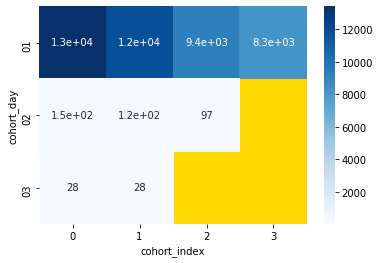

In [116]:
#Visualize results in a heatmap
#plt.figure(figsize=(21,10))
sns.heatmap(cohort_table, annot=True, cmap='Blues')

In [117]:
#Cohort table for percentage
new_cohort_table = cohort_table.divide(cohort_table.iloc[:,0],axis=0)
new_cohort_table

cohort_index,0,1,2,3
cohort_day,,,,
01,1.00,0.88,0.70,0.62
02,1.00,0.80,0.64,NaN
03,1.00,1.00,NaN,NaN


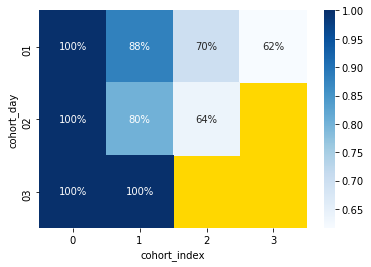

In [118]:
#Visualize results in a heatmap
#plt.figure(figsize=(21,10))
sns.heatmap(new_cohort_table, annot=True, cmap='Blues', fmt='.0%')

# Table of Contents

[Data Dictionary](#Data-Dictionary)

[Step 1: Import Libraries and Data](#Step-1:-Import-and-Cleaning)

[Step 2: Exploratory Data Analysis](#Step-2:-EDA)

> [Step 2a: Users](#Step-2a:-Users)

> [Step 2b: Levels](#Step-2b:-Levels)

[Step 3: Performance Questions](#Step-3:-Performance-Questions)

[Step 4: Retention](#Step-4:-Retention)